# 프로젝트: Vocabulary Size를 변경해서 시도해보기

### 데이터 확인하기

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### 훈련 데이터와 테스트 데이터 로드하기

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


### 데이터 출력해보기

In [4]:
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

In [5]:
print(y_train[0])
print(y_test[0])

3
3


In [6]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


### 데이터 분포 확인해보기

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


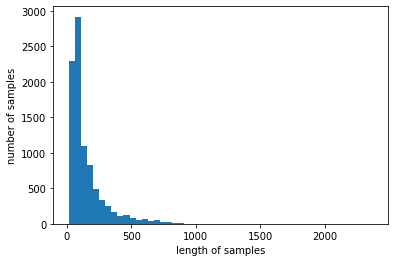

In [7]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [8]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

565248/550378 [==============================] - 0s 0us/step


In [9]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [10]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [11]:
x_train[0]

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [12]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [13]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [14]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

## 벡터화 하기

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [16]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [17]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


## 머신러닝 모델 학습

In [18]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [20]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

In [21]:
def train_ml(tfidfv, y_train, tfidfv_test, y_test):
    # 나이브 베이즈 분류기 
    mod = MultinomialNB()
    mod.fit(tfidfv, y_train)
    
    mod_predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("나이브 베이즈 정확도:", accuracy_score(y_test, mod_predicted)) #예측값과 실제값 비교
    
    # CNB
    cb = ComplementNB()
    cb.fit(tfidfv, y_train)
    
    cb_predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("CNB 정확도:", accuracy_score(y_test, cb_predicted)) #예측값과 실제값 비교
    
    # 로지스틱 회귀 
    lr = LogisticRegression(C=10000, penalty='l2')
    lr.fit(tfidfv, y_train)

    lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("로지스틱 회귀 정확도:", accuracy_score(y_test, lr_predicted)) #예측값과 실제값 비교
    
    # 선형 서포트 벡터 머신 
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
    lsvc.fit(tfidfv, y_train)
    
    lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("SVM 정확도:", accuracy_score(y_test, lsvc_predicted)) #예측값과 실제값 비교
    
    # 결정 트리(Decision Tree) 
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(tfidfv, y_train)
    
    tree_predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("결정 트리 정확도:", accuracy_score(y_test, tree_predicted)) #예측값과 실제값 비교
    
    # 랜덤 포레스트(Random Forest)
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv, y_train)
    
    forest_predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("랜덤 포레스트 정확도:", accuracy_score(y_test, forest_predicted)) #예측값과 실제값 비교
    
    # 그래디언트 부스팅 트리(GradientBoostingClassifier)
    grbt = GradientBoostingClassifier(random_state=0, verbose=3) # verbose=3
    grbt.fit(tfidfv, y_train)

    grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, grbt_predicted)) #예측값과 실제값 비교
    
    # 보팅(Voting)
    voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
        ], voting='soft', n_jobs=-1)
    voting_classifier.fit(tfidfv, y_train)
    
    voting_classifier_predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("보팅 정확도:", accuracy_score(y_test, voting_classifier_predicted)) #예측값과 실제값 비교
    
    return mod, cb, lr, lsvc, tree, forest, grbt, voting_classifier

In [22]:
mod, cb, lr, lsvc, tree, forest, grbt, voting_classifier = train_ml(tfidfv, y_train, tfidfv_test, y_test)

나이브 베이즈 정확도: 0.5997328584149599
CNB 정확도: 0.7649154051647373


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.813446126447017


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.7858414959928762
결정 트리 정확도: 0.6211041852181657
랜덤 포레스트 정확도: 0.6544968833481746
      Iter       Train Loss   Remaining Time 
         1           1.4301           18.09m
         2       76760.8864           17.94m
         3   766490025.2967           17.80m
         4 660857139232122368.0000           17.59m
         5 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           17.43m
         6 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           17.27m
         7 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           17.08m
         8 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           16.88m
         9 1006529060

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.8187889581478184


### 단어 5000개 사용

In [23]:
(x_train_5k, y_train_5k), (x_test_5k, y_test_5k) = reuters.load_data(num_words=5000, test_split=0.2)

In [24]:
decoded = []
for i in range(len(x_train_5k)):
    t = ' '.join([index_to_word[index] for index in x_train_5k[i]])
    decoded.append(t)

x_train_5k = decoded

In [25]:
decoded = []
for i in range(len(x_test_5k)):
    t = ' '.join([index_to_word[index] for index in x_test_5k[i]])
    decoded.append(t)

x_test_5k = decoded

행렬 변환

In [26]:
dtmvector = CountVectorizer()
x_train_dtm_5k = dtmvector.fit_transform(x_train_5k)
print(x_train_dtm_5k.shape)

(8982, 4867)


In [27]:
tfidf_transformer = TfidfTransformer()
tfidfv_5k = tfidf_transformer.fit_transform(x_train_dtm_5k)
print(tfidfv_5k.shape)

(8982, 4867)


In [28]:
x_test_dtm_5k = dtmvector.transform(x_test_5k) # 테스트 데이터를 DTM으로 변환
tfidfv_test_5k = tfidf_transformer.transform(x_test_dtm_5k) # DTM을 TF-IDF 행렬로 변환

In [29]:
import time
start = time.time() 

mod_5k, cb_5k, lr_5k, lsvc_5k, tree_5k, forest_5k, grbt_5k, voting_classifier_5k = train_ml(tfidfv_5k, y_train_5k, tfidfv_test_5k, y_test_5k)

print("time :", time.time() - start)

나이브 베이즈 정확도: 0.6731967943009796
CNB 정확도: 0.7707034728406055


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.8058771148708815


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.7693677649154052
결정 트리 정확도: 0.6179875333926982
랜덤 포레스트 정확도: 0.701246660730187
      Iter       Train Loss   Remaining Time 
         1           1.4697           16.56m
         2     2131099.0239           16.59m
         3 113352934366748750033493137947714414201794552363528671409179356940992512.0000           16.43m
         4 645005367195105573487290209089081189090170195029150070319832395667206596719018218881024.0000           16.23m
         5 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           16.05m
         6 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           15.86m
         7 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           15.71m
         8 443067299530301659980

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.8161175422974176
time : 2096.798014163971


### 단어 3000개 사용

In [30]:
(x_train_3k, y_train_3k), (x_test_3k, y_test_3k) = reuters.load_data(num_words=3000, test_split=0.2)

In [31]:
decoded = []
for i in range(len(x_train_3k)):
    t = ' '.join([index_to_word[index] for index in x_train_3k[i]])
    decoded.append(t)

x_train_3k = decoded

In [32]:
decoded = []
for i in range(len(x_test_3k)):
    t = ' '.join([index_to_word[index] for index in x_test_3k[i]])
    decoded.append(t)

x_test_3k = decoded

행렬 변환

In [33]:
dtmvector = CountVectorizer()
x_train_dtm_3k = dtmvector.fit_transform(x_train_3k)
print(x_train_dtm_3k.shape)

(8982, 2919)


In [34]:
tfidf_transformer = TfidfTransformer()
tfidfv_3k = tfidf_transformer.fit_transform(x_train_dtm_3k)
print(tfidfv_3k.shape)

(8982, 2919)


In [35]:
x_test_dtm_3k = dtmvector.transform(x_test_3k) #테스트 데이터를 DTM으로 변환
tfidfv_test_3k = tfidf_transformer.transform(x_test_dtm_3k) #DTM을 TF-IDF 행렬로 변환

In [36]:
start = time.time() 

mod_3k, cb_3k, lr_3k, lsvc_3k, tree_3k, forest_3k, grbt_3k, voting_classifier_3k = train_ml(tfidfv_3k, y_train_3k, tfidfv_test_3k, y_test_3k)

sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print('run time :', times)

나이브 베이즈 정확도: 0.6874443455031166
CNB 정확도: 0.7644701691896705


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.794746215494212


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.7555654496883348
결정 트리 정확도: 0.6260017809439002
랜덤 포레스트 정확도: 0.6856634016028496
      Iter       Train Loss   Remaining Time 
         1           1.4761           15.33m
         2       29810.4893           15.39m
         3 103018026703.3806           15.20m
         4 111593327959535219617691187806208.0000           15.10m
         5 1904496955476400955779467607778270076434921719903327597388087378686114846508037997135967451479015424.0000           14.95m
         6 235956225767185860904973188178954025040849742976577626543101088142147888944078511456039069709793443708307819607359488.0000           14.79m
         7 235956225767185860904973188178954025040849742976577626543101088142147888944078511456039069709793443708307819607359488.0000           14.63m
         8 235956225767185860904973188178954025040849742976577626543101088142147888944078511456039069709793443708307819607359488.0000           14.47m
         9 235956225767185860904973188178954025040849742976577626543101088

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.8098842386464826


NameError: name 'datetime' is not defined

### 단어 8000개 사용

In [37]:
(x_train_8k, y_train_8k), (x_test_8k, y_test_8k) = reuters.load_data(num_words=8000, test_split=0.2)

In [38]:
decoded = []
for i in range(len(x_train_8k)):
    t = ' '.join([index_to_word[index] for index in x_train_8k[i]])
    decoded.append(t)

x_train_8k = decoded

In [39]:
decoded = []
for i in range(len(x_test_8k)):
    t = ' '.join([index_to_word[index] for index in x_test_8k[i]])
    decoded.append(t)

x_test_8k = decoded

행렬 변환

In [40]:
dtmvector = CountVectorizer()
x_train_dtm_8k = dtmvector.fit_transform(x_train_8k)
print(x_train_dtm_8k.shape)

(8982, 7772)


In [41]:
tfidf_transformer = TfidfTransformer()
tfidfv_8k = tfidf_transformer.fit_transform(x_train_dtm_8k)
print(tfidfv_8k.shape)

(8982, 7772)


In [42]:
x_test_dtm_8k = dtmvector.transform(x_test_8k) #테스트 데이터를 DTM으로 변환
tfidfv_test_8k = tfidf_transformer.transform(x_test_dtm_8k) #DTM을 TF-IDF 행렬로 변환

In [43]:
start = time.time() 

mod_8k, cb_8k, lr_8k, lsvc_8k, tree_8k, forest_8k, grbt_8k, voting_classifier_8k = train_ml(tfidfv_8k, y_train_8k, tfidfv_test_8k, y_test_8k)

sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print('run time :', times)

나이브 베이즈 정확도: 0.6625111308993766
CNB 정확도: 0.7707034728406055


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.8098842386464826


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.7742653606411398
결정 트리 정확도: 0.6206589492430988
랜덤 포레스트 정확도: 0.6669634906500446
      Iter       Train Loss   Remaining Time 
         1           1.4623           16.70m
         2     8660007.6663           16.63m
         3   875988650.4729           16.48m
         4 487291772348199360.0000           16.30m
         5 1494368684701080172103932709351465585696707706880.0000           16.14m
         6 76262468764199180251727454826972312784663848937957200250741567905298202274824192.0000           16.01m
         7 76262468764199180251727454826972312784663848937957200250741567905298202274824192.0000           15.88m
         8 76262468764199180251727454826972312784663848937957200250741567905298202274824192.0000           15.74m
         9 76262468764199180251727454826972312784663848937957200250741567905298202274824192.0000           15.58m
        10 76262468764199180251727454826972312784663848937957200250741567905298202274824192.0000           15.42m
        11 7626246876419

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


보팅 정확도: 0.813446126447017


NameError: name 'datetime' is not defined

In [44]:
bayse = [0.5997328584149599, 0.6731967943009796, 0.6856634016028496, 0.6567230632235085, 0.6193232413178985]
cnb = [0.7649154051647373, 0.7707034728406055, 0.7346393588601959, 0.7707034728406055, 0.7671415850400712]
logistic = [0.813446126447017, 0.8058771148708815, 0.7346393588601959, 0.7707034728406055, 0.7671415850400712]
svm = [0.784060552092609, 0.7666963490650045, 0.7172751558325913, 0.7813891362422084, 0.7778272484416741]
tree = [0.6211041852181657, 0.6179875333926982, 0.6179875333926982, 0.6202137132680321, 0.6211041852181657]
rf = [0.6544968833481746, 0.701246660730187, 0.707479964381122, 0.674087266251113, 0.6714158504007124]
gbs = [0.7702582368655387, 0.767586821015138, 0.7457702582368655, 0.7666963490650045, 0.769813000890472]
voting = [0.8187889581478184, 0.8161175422974176, 0.7845057880676759, 0.8116651825467498, 0.8178984861976848]

vocab_size_list = ['whole', '5k', '3k', '8k']
model_list = [bayse, cnb, logistic, svm, tree, rf, gbs, voting]

In [45]:
acc_dict = {}
for idx, vs in enumerate(vocab_size_list):
    acc_list = []
    for model in model_list:
        acc_list.append(model[idx])
    acc_dict[vs] = sum(acc_list)/len(model_list)

In [46]:
acc_dict

{'whole': 0.7283504007123776,
 '5k': 0.7399265360641141,
 '3k': 0.7159951024042743,
 '8k': 0.7315227070347284}

# [GD-04] 회고

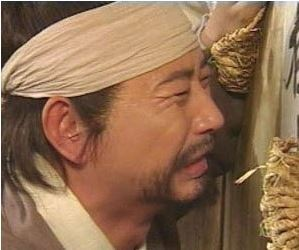

이번 과제는 코랩에서 했어야 했는데,,, 제가 코드 복사하는게 너무 번거로워서 그냥 노드에서 돌렸더니,,, 딥러닝 학습을 하는데ㅎㅎㅎ
네... 그렇습니다ㅋㅋㅋㅋㅋ

이번 과제 별 한 개도 감지덕지하며 일단 제출하겠습니다ㅜㅜㅜ

시간이 없어요ㅜㅜㅜ 죄송해요... 다음에는 코랩으로 과제 실행해서 제출하겠습니다...